# Payment Classification

The goal of this project is trying to build an algorithm to automatically test if a given payment information description belongs to the following three categories respectively: `is_productive`, `use_salaries`, and `use_hours`. These categories are independent, which means a specific payment can belong to more than one categories. 

In [1]:
ls data

README.md          paycode_data.xlsx


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1 - Data Preprocessing

Read Data: 

In [3]:
data = pd.read_excel('data/paycode_data.xlsx')
data.head()

,report_id,pay_type_id,pay_type_description,Total_Dollars,Total_Hours,Hourly Rate,cr255210db1_pay_pay_types.is_productive,cr255210db1_pay_pay_types.use_salaries,cr255210db1_pay_pay_types.use_hours
0,87,101,MISC-REGULAR,93339554.0,2679091.0,34.840009,1,1,1
1,87,102,MISC-SICK PAY,5258853.0,158087.0,33.265563,0,1,1
2,87,104,MISC-VACATION,6710429.0,196136.0,34.213143,0,1,1
3,87,105,MISC-OTHER TIMEOFF,10103587.0,289865.0,34.856181,0,1,1
4,87,201,UNIFORM-REGULAR,5080.0,180.0,28.222222,1,1,1


The first two columns seems useless, so let's remove (aka "drop") them: 

In [4]:
data = data.drop(["report_id", "pay_type_id"], axis = 1); 
data.head()

,pay_type_description,Total_Dollars,Total_Hours,Hourly Rate,cr255210db1_pay_pay_types.is_productive,cr255210db1_pay_pay_types.use_salaries,cr255210db1_pay_pay_types.use_hours
0,MISC-REGULAR,93339554.0,2679091.0,34.840009,1,1,1
1,MISC-SICK PAY,5258853.0,158087.0,33.265563,0,1,1
2,MISC-VACATION,6710429.0,196136.0,34.213143,0,1,1
3,MISC-OTHER TIMEOFF,10103587.0,289865.0,34.856181,0,1,1
4,UNIFORM-REGULAR,5080.0,180.0,28.222222,1,1,1


Also, the last three column names seems a little messy. We can rename them: 

In [5]:
data.columns = ['pay_type_description', 'total_dollars', 'total_hours', 'hourly_rate', 'is_productive', 'use_salaries', 'use_hours']
data.head()

,pay_type_description,total_dollars,total_hours,hourly_rate,is_productive,use_salaries,use_hours
0,MISC-REGULAR,93339554.0,2679091.0,34.840009,1,1,1
1,MISC-SICK PAY,5258853.0,158087.0,33.265563,0,1,1
2,MISC-VACATION,6710429.0,196136.0,34.213143,0,1,1
3,MISC-OTHER TIMEOFF,10103587.0,289865.0,34.856181,0,1,1
4,UNIFORM-REGULAR,5080.0,180.0,28.222222,1,1,1


# Step 2 - Split Data into Training and Testing

In [6]:
total = len(data)
total

62391

We'll just use the 80/20 ratio for training and testing: 

In [7]:
train = data.iloc[ : int(total*0.8)]
train.head()

,pay_type_description,total_dollars,total_hours,hourly_rate,is_productive,use_salaries,use_hours
0,MISC-REGULAR,93339554.0,2679091.0,34.840009,1,1,1
1,MISC-SICK PAY,5258853.0,158087.0,33.265563,0,1,1
2,MISC-VACATION,6710429.0,196136.0,34.213143,0,1,1
3,MISC-OTHER TIMEOFF,10103587.0,289865.0,34.856181,0,1,1
4,UNIFORM-REGULAR,5080.0,180.0,28.222222,1,1,1


In [8]:
train.tail()

,pay_type_description,total_dollars,total_hours,hourly_rate,is_productive,use_salaries,use_hours
49907,B12 BNS RET 12,10000.00,0.0,0.0,0,1,0
49908,BN9 BNS OTS,308285.00,0.0,0.0,0,1,0
49909,BNA BNSANNUAL,7062.64,0.0,0.0,0,1,0
49910,BNC BNSQUARTER,550.00,0.0,0.0,0,1,0
49911,BNE BNSSODOH,50000.00,0.0,0.0,0,1,0


In [9]:
test = data.iloc[int(total*0.8):]
test.head()

,pay_type_description,total_dollars,total_hours,hourly_rate,is_productive,use_salaries,use_hours
49912,CEC MISCCOMP,8898.83,0.0,0.0,0,1,0
49913,Imputed Income,12627.00,0.0,0.0,0,1,0
49914,Med Direct,9100.00,0.0,0.0,0,1,0
49915,CHO HOUSECLRG,38736.00,0.0,0.0,0,1,0
49916,PT2 EIB,18502.45,0.0,0.0,0,1,0


# Step 3 - Classifier by Separability

<h3> 1. Total Dollars </h3>

There might be some correlation between the total dollar amount and the categories. So let's run some tests and see. 

<h3 style="color:green"> total_dollars vs is_productive </h3>

### Training (Learning) 

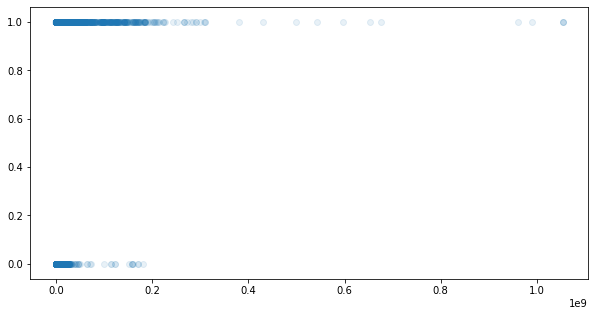

In [10]:
fig = plt.figure(figsize=(10, 5))
plt.scatter(x = train.total_dollars, y = train.is_productive, alpha = 0.1)

It seems like that when the dollar amount gets large enough, it will fall into 1 (meaning IS productive). Let's find out more about the threshold. 

In [11]:
max_not_productive_amount = max(train[train.is_productive == 0].total_dollars)
max_not_productive_amount

181240153.41

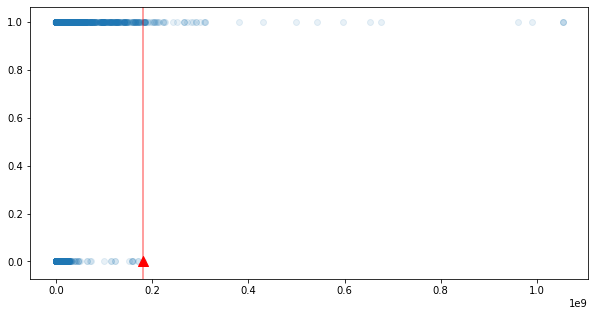

In [12]:
fig = plt.figure(figsize=(10, 5))
plt.scatter(x = train.total_dollars, y = train.is_productive, alpha = 0.1)
plt.scatter(max_not_productive_amount, 0, marker = '^', c = "red", s = 100) 
plt.axvline(x = max_not_productive_amount, color = "red", alpha = 0.5)

Which means that to the right of the red verticle line, the payment is very likely productive. 

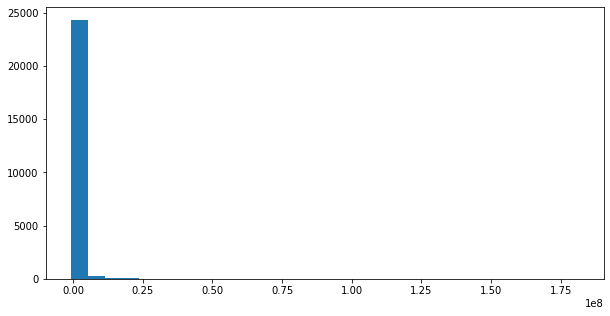

In [13]:
fig = plt.figure(figsize=(10, 5))
plt.hist(train[train.is_productive == 0].total_dollars, bins = 30); 

In [14]:
np.percentile(a = train[train.is_productive == 0].total_dollars, q = [25, 50, 75, 80, 90, 95])

array([   1893.46 ,   22893.49 ,  158085.16 ,  249589.368,  757784.136,
       1806148.05 ])

In [15]:
np.percentile(a = train[train.is_productive == 0].total_dollars, q = [99.9, 99.91, 99.92])

array([38455612.83772235, 41870477.160404  , 45303660.98975977])

We can set the approximate threshold value to be $45303660, marked by the green triangle in the graph below. Anything above that can be classified as `is_productive`. 

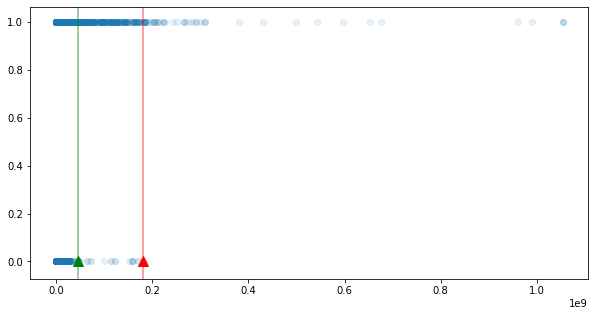

In [16]:
fig = plt.figure(figsize=(10, 5))
plt.scatter(x = train.total_dollars, y = train.is_productive, alpha = 0.1)
plt.scatter(max_not_productive_amount, 0, marker = '^', c = "red", s = 100) 
plt.axvline(x = max_not_productive_amount, color = "red", alpha = 0.5)
plt.scatter(45303660, 0, marker = '^', c = "green", s = 100) 
plt.axvline(x = 45303660, color = "green", alpha = 0.5)

### Testing

In [17]:
def testing(threshold, x_attribute, y_attribute):
    prediction = []
    if x_attribute == "total_dollars":
        test_x = test.total_dollars
    elif x_attribute == "total_hours":
        test_x = test.total_hours
    elif x_attribute == "hourly_rate":
        test_x = test.hourly_rate
    else:
        print("ERROR: x_attribute is not recognized")
        
    for amount in test_x:
        if amount > threshold: 
            prediction.append(1)
        else:
            prediction.append(0)
    
    count = len(prediction)
    if y_attribute == "is_productive": 
        truth = list(test.is_productive)
    elif y_attribute == "use_salaries":
        truth = list(test.use_salaries)
    elif y_attribute == "use_hours":
        truth = list(test.use_hours)
    else:
        print("ERROR: y_attribute is not recognized")
    correct_count = 0 
    for i in range(count):
        if prediction[i] == truth[i]:
            correct_count += 1
    print("The correct rate of classifier is: ", correct_count / count)

In [18]:
testing(45303660, "total_dollars", "is_productive")

The correct rate of classifier is:  0.5629457488580816


<h3 style="color:green"> total_dollars vs use_salaris </h3>

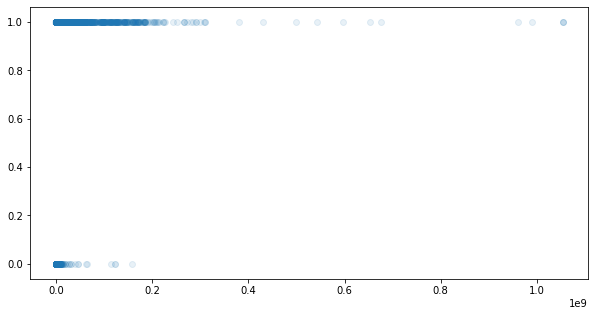

In [19]:
fig = plt.figure(figsize=(10, 5))
plt.scatter(x = train.total_dollars, y = train.use_salaries, alpha = 0.1)

Okay, seems like a better correlation. 

In [20]:
threshold = np.percentile(a = train[train.use_salaries == 0].total_dollars, q = 99.7)
threshold

13888459.426900025

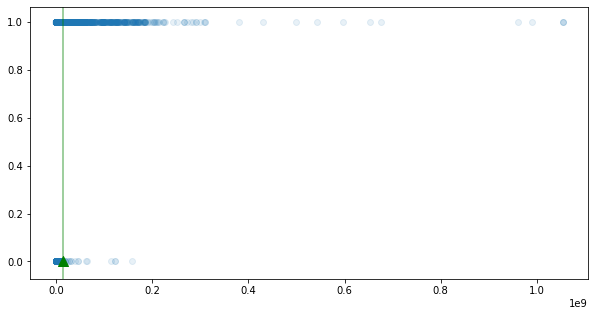

In [21]:
fig = plt.figure(figsize=(10, 5))
plt.scatter(x = train.total_dollars, y = train.use_salaries, alpha = 0.1)
plt.scatter(threshold, 0, marker = '^', c = "green", s = 100) 
plt.axvline(x = threshold, color = "green", alpha = 0.5)

In [22]:
testing(threshold, "total_dollars", "use_salaries")

The correct rate of classifier is:  0.18551165958810803


Whoa, okay. Very bad. 

<h3 style="color:green"> total_dollars vs use_hours </h3>

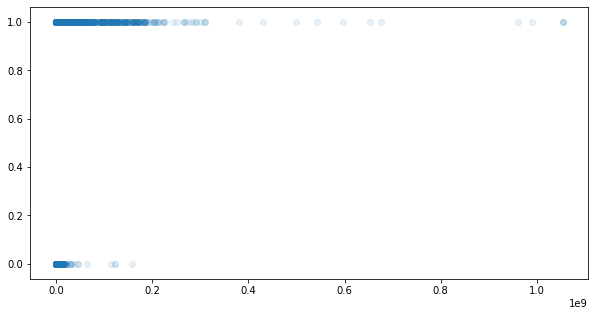

In [23]:
fig = plt.figure(figsize=(10, 5))
plt.scatter(x = train.total_dollars, y = train.use_hours, alpha = 0.1)

The graph looks very similar to the total_dollars vs use_salaries graph. So it's probably not seperable. 

<h3> 2. Total Hours </h3>

<h3 style="color:green"> total_hours vs is_productive </h3>

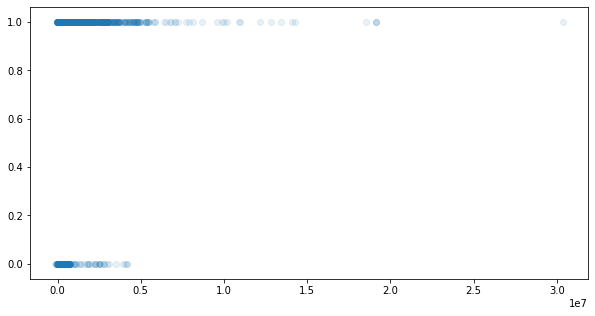

In [24]:
fig = plt.figure(figsize=(10, 5))
plt.scatter(x = train.total_hours, y = train.is_productive, alpha = 0.1)

<h3 style="color:green"> total_hours vs use_salaries </h3>

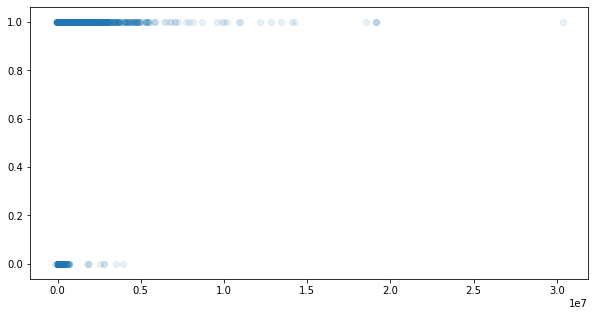

In [25]:
fig = plt.figure(figsize=(10, 5))
plt.scatter(x = train.total_hours, y = train.use_salaries, alpha = 0.1)

<h3 style="color:green"> total_hours vs use_hours </h3>

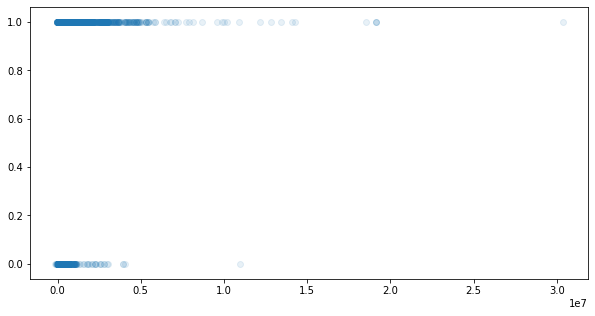

In [26]:
fig = plt.figure(figsize=(10, 5))
plt.scatter(x = train.total_hours, y = train.use_hours, alpha = 0.1)

<h3> 3. Hourly Rate </h3>

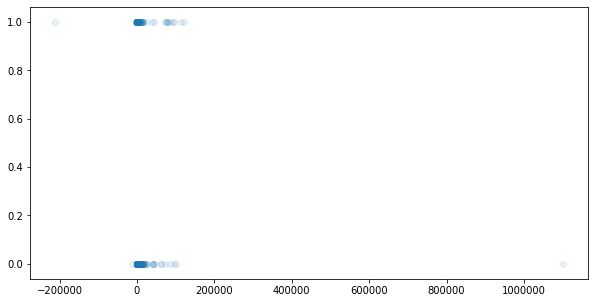

In [27]:
fig = plt.figure(figsize=(10, 5))
plt.scatter(x = train.hourly_rate, y = train.is_productive, alpha = 0.1)

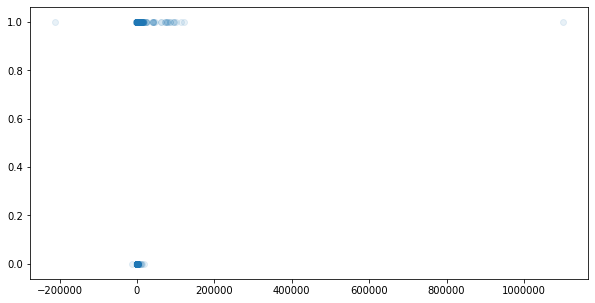

In [28]:
fig = plt.figure(figsize=(10, 5))
plt.scatter(x = train.hourly_rate, y = train.use_salaries, alpha = 0.1)

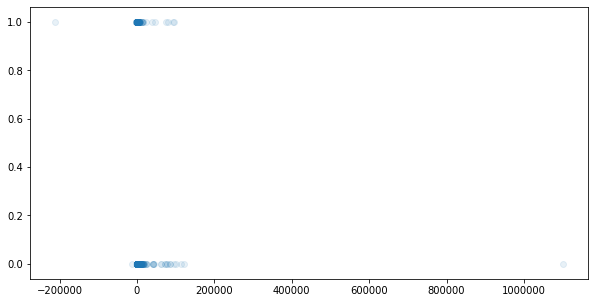

In [29]:
fig = plt.figure(figsize=(10, 5))
plt.scatter(x = train.hourly_rate, y = train.use_hours, alpha = 0.1)

# Step 4 - Machine Learning Classifier based on total_dollars, total_hours, and hourly_rate all together

In [30]:
from tensorflow import keras
import tensorflow as tf
from scipy import stats
from keras import regularizers
from sklearn import preprocessing

Using TensorFlow backend.


In [31]:
data.head()

,pay_type_description,total_dollars,total_hours,hourly_rate,is_productive,use_salaries,use_hours
0,MISC-REGULAR,93339554.0,2679091.0,34.840009,1,1,1
1,MISC-SICK PAY,5258853.0,158087.0,33.265563,0,1,1
2,MISC-VACATION,6710429.0,196136.0,34.213143,0,1,1
3,MISC-OTHER TIMEOFF,10103587.0,289865.0,34.856181,0,1,1
4,UNIFORM-REGULAR,5080.0,180.0,28.222222,1,1,1


As we can see, the values in `total_dollars` and `total_hours` can get very large, so it's better to scale the data first to avoid bias later on. 

Note: It is probably not a good idea to standardize the data, since, as we can see from the graphs above, the distributions do not look very "normal". 

In [32]:
min_max_scaler = preprocessing.MinMaxScaler()

In [33]:
data["total_dollars_scaled"] = min_max_scaler.fit_transform(data[["total_dollars"]])
data["total_hours_scaled"] = min_max_scaler.fit_transform(data[["total_hours"]])
data["hourly_rate_scaled"] = min_max_scaler.fit_transform(data[["hourly_rate"]])
data.head()

,pay_type_description,total_dollars,total_hours,hourly_rate,is_productive,use_salaries,use_hours,total_dollars_scaled,total_hours_scaled,hourly_rate_scaled
0,MISC-REGULAR,93339554.0,2679091.0,34.840009,1,1,1,0.086697,0.092102,0.311850
1,MISC-SICK PAY,5258853.0,158087.0,33.265563,0,1,1,0.009987,0.009415,0.311849
2,MISC-VACATION,6710429.0,196136.0,34.213143,0,1,1,0.011251,0.010662,0.311850
3,MISC-OTHER TIMEOFF,10103587.0,289865.0,34.856181,0,1,1,0.014207,0.013737,0.311850
4,UNIFORM-REGULAR,5080.0,180.0,28.222222,1,1,1,0.005412,0.004235,0.311846


In [34]:
data = data.drop(["total_dollars", "total_hours", "hourly_rate"], axis = 1); 
data.head()

,pay_type_description,is_productive,use_salaries,use_hours,total_dollars_scaled,total_hours_scaled,hourly_rate_scaled
0,MISC-REGULAR,1,1,1,0.086697,0.092102,0.311850
1,MISC-SICK PAY,0,1,1,0.009987,0.009415,0.311849
2,MISC-VACATION,0,1,1,0.011251,0.010662,0.311850
3,MISC-OTHER TIMEOFF,0,1,1,0.014207,0.013737,0.311850
4,UNIFORM-REGULAR,1,1,1,0.005412,0.004235,0.311846


Now, after scaling, again, we split the data into training and testing:

In [35]:
train = data.iloc[ : int(total*0.8)]
train.head()

,pay_type_description,is_productive,use_salaries,use_hours,total_dollars_scaled,total_hours_scaled,hourly_rate_scaled
0,MISC-REGULAR,1,1,1,0.086697,0.092102,0.311850
1,MISC-SICK PAY,0,1,1,0.009987,0.009415,0.311849
2,MISC-VACATION,0,1,1,0.011251,0.010662,0.311850
3,MISC-OTHER TIMEOFF,0,1,1,0.014207,0.013737,0.311850
4,UNIFORM-REGULAR,1,1,1,0.005412,0.004235,0.311846


In [36]:
train.tail()

,pay_type_description,is_productive,use_salaries,use_hours,total_dollars_scaled,total_hours_scaled,hourly_rate_scaled
49907,B12 BNS RET 12,0,1,0,0.005416,0.004229,0.311828
49908,BN9 BNS OTS,0,1,0,0.005676,0.004229,0.311828
49909,BNA BNSANNUAL,0,1,0,0.005413,0.004229,0.311828
49910,BNC BNSQUARTER,0,1,0,0.005408,0.004229,0.311828
49911,BNE BNSSODOH,0,1,0,0.005451,0.004229,0.311828


In [37]:
test = data.iloc[int(total*0.8):]
test.head()

,pay_type_description,is_productive,use_salaries,use_hours,total_dollars_scaled,total_hours_scaled,hourly_rate_scaled
49912,CEC MISCCOMP,0,1,0,0.005415,0.004229,0.311828
49913,Imputed Income,0,1,0,0.005418,0.004229,0.311828
49914,Med Direct,0,1,0,0.005415,0.004229,0.311828
49915,CHO HOUSECLRG,0,1,0,0.005441,0.004229,0.311828
49916,PT2 EIB,0,1,0,0.005423,0.004229,0.311828


In [38]:
train_x = train[["total_dollars_scaled", "total_hours_scaled", "hourly_rate_scaled"]]
valid_x = test[["total_dollars_scaled", "total_hours_scaled", "hourly_rate_scaled"]]

# train_x = train[["total_dollars_scaled"]]
# valid_x = test[["total_dollars_scaled"]]

train_y_is_productive = train[["is_productive"]]
valid_y_is_productive = test.is_productive

train_y_use_salaries = train[["use_salaries"]]
valid_y_use_salaries = test.use_salaries

train_y_use_hours = train[["use_hours"]]
valid_y_use_hours = test.use_hours

In [39]:
train_x.head()

,total_dollars_scaled,total_hours_scaled,hourly_rate_scaled
0,0.086697,0.092102,0.311850
1,0.009987,0.009415,0.311849
2,0.011251,0.010662,0.311850
3,0.014207,0.013737,0.311850
4,0.005412,0.004235,0.311846


In [40]:
valid_x.head()

,total_dollars_scaled,total_hours_scaled,hourly_rate_scaled
49912,0.005415,0.004229,0.311828
49913,0.005418,0.004229,0.311828
49914,0.005415,0.004229,0.311828
49915,0.005441,0.004229,0.311828
49916,0.005423,0.004229,0.311828


In [41]:
type(train.is_productive)

pandas.core.series.Series

<h2 style="color:green"> Multi-Layer Perceptron (Neural Network) </h2> 

In [44]:
model = keras.Sequential([
    # keras.layers.Dense(10, input_dim = 3, kernel_initializer ='normal', activation='relu', kernel_regularizer = keras.regularizers.l2(2)),
    
    keras.layers.Dense(10, input_dim = 3, activation='softmax'),            
    keras.layers.Dense(1000),
    keras.layers.Dense(1000),
    keras.layers.Dense(1, activation='softmax'),
])

In [45]:
optimizer = keras.optimizers.Adagrad(lr = 1)
model.compile(optimizer = optimizer, loss='MSE')

model.fit(train_x, train_y_is_productive, epochs = 5, batch_size = 1000)

Epoch 1/5
49912/49912 [==============================] - 11s 222us/sample - loss: 0.4969
Epoch 2/5
49912/49912 [==============================] - 9s 182us/sample - loss: 0.4969
Epoch 3/5
49912/49912 [==============================] - 8s 169us/sample - loss: 0.4969
Epoch 4/5
49912/49912 [==============================] - 7s 145us/sample - loss: 0.4969
Epoch 5/5
49912/49912 [==============================] - 7s 143us/sample - loss: 0.4969


The loss barely changes. 

In [46]:
predictions = model.predict(valid_x)

In [47]:
predictions[:10]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [48]:
len(predictions)

12479

In [49]:
predictions = predictions.reshape((len(predictions), ))
valid_y_is_productive = list(valid_y_is_productive)

In [50]:
count = 0
for i in range(12479):
    if predictions[i] == valid_y_is_productive[i]:
        count += 1
print(count / 12479)

0.44130138632903276


The Multi-Layer Perceptron model ended up giving us all '1's... Probably not a very good model. 

<h2 style="color:green"> Multilinear Regression</h2>

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
reg = LinearRegression().fit(train_x, train_y_is_productive)

In [53]:
print("Train regression score: ", str(reg.score(train_x, train_y_is_productive)))

Train regression score:  0.004744008040250769


The train regression score is so low already. Multilinear Regression is probably really bad too. 

<h2 style="color:green"> Random Forest</h2>

In [61]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
rf = RandomForestRegressor(max_depth = 100, random_state = 0, n_estimators = 300)

In [63]:
rf.fit(train_x, train_y_use_hours)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [65]:
pred = rf.predict(valid_x)
train_pred = rf.predict(train_x)

pred = pred.reshape((len(pred), ))
train_pred = train_pred.reshape((len(train_pred), ))

pred = [round(x) for x in pred]
train_pred = [round(x) for x in train_pred]

In [66]:
sum(pred)

5588.0

In [67]:
count = 0
vy = list(valid_y_use_hours)
for i in range(12479):
    if pred[i] == vy[i]:
        count += 1
print(count / 12479)

0.8535940379838128


In [71]:
count = 0
for i in range(len(train_pred)):
    if train_pred[i] == train_y_use_hours.use_hours[i]:
        count += 1
print(count / len(train_pred))

0.9137281615643532


----

In [74]:
from scipy.stats import mode

In [128]:
data.head()

,pay_type_description,is_productive,use_salaries,use_hours,total_dollars_scaled,total_hours_scaled,hourly_rate_scaled
0,MISC-REGULAR,1,1,1,0.086697,0.092102,0.311850
1,MISC-SICK PAY,0,1,1,0.009987,0.009415,0.311849
2,MISC-VACATION,0,1,1,0.011251,0.010662,0.311850
3,MISC-OTHER TIMEOFF,0,1,1,0.014207,0.013737,0.311850
4,UNIFORM-REGULAR,1,1,1,0.005412,0.004235,0.311846


We need to replace float types in `pay_type_description` to strings

In [129]:
data["pay_type_description"] = [str(name) for name in data.pay_type_description]

In [138]:
data.head()

,pay_type_description,is_productive,use_salaries,use_hours,total_dollars_scaled,total_hours_scaled,hourly_rate_scaled
0,MISC-REGULAR,1,1,1,0.086697,0.092102,0.311850
1,MISC-SICK PAY,0,1,1,0.009987,0.009415,0.311849
2,MISC-VACATION,0,1,1,0.011251,0.010662,0.311850
3,MISC-OTHER TIMEOFF,0,1,1,0.014207,0.013737,0.311850
4,UNIFORM-REGULAR,1,1,1,0.005412,0.004235,0.311846


In [139]:
list(data.pay_type_description).count("MISC-SICK PAY")

6

In [141]:
data[data.pay_type_description == "MISC-REGULAR"].is_productive

0        1
1771     1
7502     1
21858    1
Name: is_productive, dtype: int64

In [170]:
temp = data[data.pay_type_description.str.contains("Call Back")]

In [172]:
set(temp.pay_type_description)

{'2nd Job Call Back S1',
 '2nd Job Call Back S2',
 '2nd Job Call Back S3',
 '5048_Call Back @ 0.5',
 '5050_Call Back @ 1.5',
 '7_Call Back',
 'Call Back $',
 'Call Back (Not FLSA)',
 'Call Back - 1.5',
 'Call Back - 2 Times BRP',
 'Call Back - CHI',
 'Call Back - DT Base',
 'Call Back - DT Prem',
 'Call Back - DT Prem Sonoma',
 'Call Back - OT Base',
 'Call Back - OT Prem',
 'Call Back - Straight',
 'Call Back 1.5',
 'Call Back 2.0',
 'Call Back 20 Str',
 'Call Back 3 @ 25%',
 'Call Back @ 1.5',
 'Call Back Charg 1.50',
 'Call Back Charge 5%',
 'Call Back DT',
 'Call Back DT 2 @ 9%',
 'Call Back DT 3 @ 25%',
 'Call Back DT Prem',
 'Call Back DT, Shift 1',
 'Call Back DT, Shift 2',
 'Call Back DT, Shift 3',
 'Call Back Day',
 'Call Back Day Divide Premium',
 'Call Back Dbl Time Straight',
 'Call Back Dbl Tm',
 'Call Back Double Time (Base)',
 'Call Back Doubletime',
 'Call Back Doubletime Guarantee',
 'Call Back FLSA',
 'Call Back Flat',
 'Call Back Guar Holiday 2.5',
 'Call Back Guar H

In [167]:
len(temp)

163

In [168]:
len(temp[temp.use_hours == 1])

159

In [169]:
mode(temp.use_hours)[0][0]

1